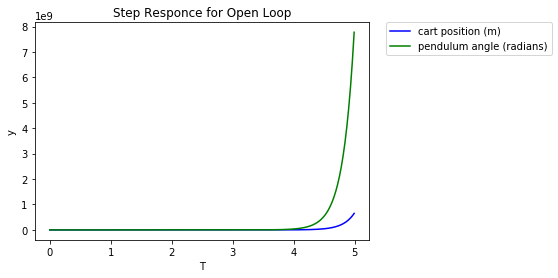

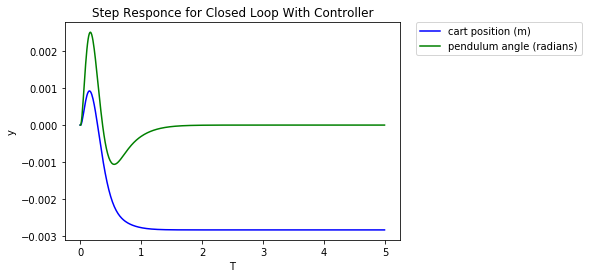

In [97]:
# state-based simulation equation:
# x_dot = A.x + B.u
# y = C.x + D.u
# e.g., u = -(k.T).x. u can be a non-linear 
# ref: Inverted Pendulum: System Modeling
# http://ctms.engin.umich.edu/CTMS/index.php?example=InvertedPendulum&section=ControlStateSpace 

import numpy as np
import matplotlib.pyplot as plt
k = np.matrix([[0],[1]])
def con(y, s, x):
    return -1 * (y - s)
#print con(0, 0.5, 0)

def closedLoop(y, s, x):
    # fill-in K matrix euation. Below is just a controller matrix for
    # the Inverted Pendulum pendulum problem
    K = np.array([-70.7107  ,-37.8345  ,105.5298   ,20.9238])
    return s-K.dot(x)
#print con(0, 0.5, 0)


def simulate(A, B, C, D, regulator_func, s, T, x0=0):
    #intitialize y, u
    y = np.matrix(np.zeros((C.shape[0],len(T))))
    u = np.zeros((len(T),np.size(x0,1)))    
    if type(x0) is int:
        xt = np.matrix([x0]*len(A)).T
        print "x0 = \n{}".format(xt)
    else:
        xt = x0
    #print "y.shape = \n",y.shape
    #print "len(T) = \n",len(T)
    #print "A.shape = \n",(A).shape
    #print "xt.shape = \n",(xt).shape
    #print "B.shape = \n",(B).shape
    #print "u.shape = \n",u.shape
    #print "s.shape = \n",s.shape
    #print "C.T.shape = \n",C.T.shape
    #print "D.shape = \n",D.shape
    
    for i, t in enumerate(T):
        u[[i],:] = regulator_func(y[:,i], s[i],xt)
        x_dot = A.dot(xt) + B.dot(u[[i],:])
        y[:,i] = (C).dot(xt) + D.dot(u[[i],:])
        #print "u[[i],:].shape = \n",u[[i],:].shape
        #print "xt = \n",xt
        #print "regulator_func = \n",(regulator_func(y[i], s[i],xt))
        #print "x_dot = \n",x_dot
        #print "(C.T).dot(xt) = \n",((C.T).dot(xt)).shape
        #print " D.dot(u[[i],:]) = \n",(D.dot(u[[i],:])).shape
        #print "(C.T).dot(xt) + D.dot(u[[i],:]) = \n",((C.T).dot(xt) + D.dot(u[[i],:])).shape
        #print "y[[i]] = \n",y[[i]]
        if i < len(T)-1:
            xt = xt + x_dot*(T[i+1]-T[i])
    return y, u


# test a Inverted Pendulum function
M = 0.5;
m = 0.2;
b = 0.1;
I = 0.006;
g = 9.8;
l = 0.3;

p = I*(M+m)+M*m*(l**2); #denominator for the A and B matrices

# State space matries: A, B, C, D
A = np.matrix([[0      ,1              ,0           ,0],
     [0 ,-(I+m*(l**2))*b/p  ,(m**2)*g*(l**2)/p   ,0],
     [0      ,0              ,0           ,1],
     [0 ,-(m*l*b)/p       ,m*g*l*(M+m)/p  ,0]]);

B = np.matrix([[     0],
     [(I+m*(l**2))/p],
          [0],
        [m*l/p],]);

C = np.matrix([[1 ,0 ,0 ,0],
     [0 ,0 ,1 ,0],]);

D = np.matrix([[0],
     [0]]);

# initial X
x0 = np.matrix(np.zeros(A.shape[0])).T

#T: time 
T = np.arange(0, 5, 0.01) 

#s: input, e.g., step function with amplitude of 0.2
s =0.2*np.ones(len(T));

# opened loop 
inputSignal = lambda y,s,x: s
regulator_func = inputSignal
y, u = simulate(A, B, C, D, regulator_func, s, T, x0)
plt.figure()
line1, = plt.plot(T, np.array(y[0,:].T), 'b', label='cart position (m)')
line2, = plt.plot(T, np.array(y[1,:].T), 'g', label='pendulum angle (radians)')
first_legend = plt.legend(handles=[line1], loc=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('T')
plt.ylabel('y')
plt.title('Step Responce for Open Loop')


# closed loop 
regulator_func = closedLoop
y, u = simulate(A, B, C, D, regulator_func, s, T, x0)
plt.figure()
line1, = plt.plot(T, np.array(y[0,:].T), 'b', label='cart position (m)')
line2, = plt.plot(T, np.array(y[1,:].T), 'g', label='pendulum angle (radians)')
first_legend = plt.legend(handles=[line1], loc=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('T')
plt.ylabel('y')
plt.title('Step Responce for Closed Loop With Controller')
plt.show()

In [10]:
import numpy
import matplotlib.pyplot as plt
import control as con

# pt2 System
K = 1
d = 0.83
T = .1
delay = 0.246

a0 = 1
a1 = (2 * d * T) #16
a2 = (T**2) #100
b0 = K

# Polynom
#tf_pt2 = con.matlab.tf(K, [a2, a1, a0])

# Zustandsraum
#ss = con.matlab.tf2ss(tf_pt2)
#print "tf_pt2.C", ss.C
#Q = (numpy.matrix.getH(ss.C)).dot(ss.C)
#print "Q.shape", Q.shape
#R = numpy.diag([1, 1]);
#(K, S, E) = con.statefbk.lqr(ss.A,ss.B,Q,R)
#print ss

#CL = con.feedback(ss, 1);

#yout2, T2 = con.matlab.step(tf_pt2) # step open loop
#plt.plot(T2, yout2, 'r-', label='open')

#yout2, T2 = con.matlab.step(CL) # step closed loop
#plt.plot(T2, yout2, 'b-', label='closed')

